<a href="https://colab.research.google.com/github/dudaholandah/PIBIC/blob/main/Nutricao/wordcloud1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel("sample_data/tabela_veg.xlsx", sheet_name='Plan1')

In [4]:
data.head()

,Classificação,Nome do Produto,Ingredientes,Porção,Kcal,Carboidratos,Açúcares,Proteínas,Gorduras Totais,Gorduras Saturadas,Fibras,Sódio,B12,Cálcio,Zinco,Kcal.1,Carboidratos.1,Açúcares.1,Proteínas.1,Gorduras Totais.1,Gorduras Saturadas.1,Fibras .1,Sódio.1,B12.1,Cálcio.1,Zinco.1
0,CARNES 1,Hambúrguer Fazenda Futuro 2.0,"água, proteína texturizada de soja, proteína d...",80.0,197.0,10.0,0.0,11.0,13,4.2,2.8,476.0,0.0,0.0,0.0,246.25,12.50,0.0,13.75,16.25,5.25,3.500,595.0,0.0,0.0,0.0
1,CARNES 2,Carne Moída do Futuro,"água, proteína texturizada de soja, proteína d...",80.0,168.0,11.0,0.0,8.2,10,9.0,0.7,392.0,0.0,0.0,0.0,210.00,13.75,0.0,10.25,12.50,11.25,0.875,490.0,0.0,0.0,0.0
2,CARNES 3,Almôndega do Futuro,"água, proteína texturizada de soja, proteína i...",80.0,168.0,11.0,0.0,8.2,10,9.0,0.7,392.0,0.0,0.0,0.0,210.00,13.75,0.0,10.25,12.50,11.25,0.875,490.0,0.0,0.0,0.0
3,FRANGOS 3,Frango do Futuro,"água, proteína texturizada de soja, proteína i...",80.0,168.0,11.0,0.0,8.2,10,9.0,0.7,392.0,0.0,0.0,0.0,210.00,13.75,0.0,10.25,12.50,11.25,0.875,490.0,0.0,0.0,0.0
4,SUÍNOS 1,Linguiça do Futuro,"água, proteína texturizada de soja, proteína i...",50.0,139.0,7.7,0.0,5.7,9.5,3.9,0.2,294.0,0.0,0.0,0.0,278.00,15.40,0.0,11.40,19.00,7.80,0.400,588.0,0.0,0.0,0.0


In [ ]:
import re

stopwords = ['de', 'e', 'em']
stopsigns = [',', '.', '(', ')']

carnes = []
text = ""

for i in range(278):
  if re.findall('^CARNES',data['Classificação'][i]):
    ingredientes = data['Ingredientes'][i]

    for word in stopwords:
      token = " " + word + " "
      ingredientes = ingredientes.replace(token, " ")

    for sign in stopsigns:
      ingredientes = ingredientes.replace(sign, " ")

    ingredientes = ingredientes.split()

    for word in ingredientes:
      carnes.append(word.lower())
      text += word.lower()
      text += " "

print(carnes)
print(text)

In [ ]:
freq_carnes = {}

for elem in carnes:
  if elem in freq_carnes:
    freq_carnes[elem] += 1
  else:
    freq_carnes.update({elem: 1})

import operator
sorted_freq = sorted(freq_carnes.items(), key=operator.itemgetter(1), reverse=True)

for key, value in sorted_freq:
    print(key, value)

In [ ]:
import plotly.express as px

df = pd.DataFrame(data=sorted_freq, columns=['ingredientes', 'frequencia'])

fig = px.bar(df, x="ingredientes", y="frequencia")
fig.update_xaxes(range=(-.5, 30.5))

fig.show()

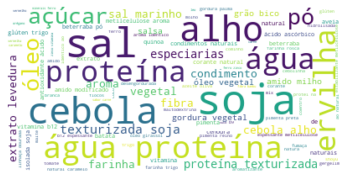

In [41]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()